In [1]:
import pandas as pd
running = pd.read_csv('C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Running Analysis/activities.csv')


In [2]:
# Display the first few rows of the run activities DataFrame
print(running.head())

   Activity ID                Activity Name  Description  \
0   2284658991  Freiburg im Breisgau Laufen          NaN   
1   2284658936  Freiburg im Breisgau Laufen          NaN   
2   2228102647  Freiburg im Breisgau Laufen          NaN   
3   2104984694  Freiburg im Breisgau Laufen          NaN   
4   2084195352  Freiburg im Breisgau Laufen          NaN   

          Begin Timestamp  Begin Timestamp (Raw Milliseconds)  \
0   Sa, Nov 4, 2017 12:07                       1509793643000   
1    Fr, Nov 3, 2017 9:47                       1509698845000   
2  Mi, Okt 25, 2017 16:31                       1508941914000   
3  Fr, Okt 13, 2017 11:53                       1507888391000   
4   Mo, Okt 2, 2017 14:51                       1506948664000   

            End Timestamp  End Timestamp (Raw Milliseconds)  \
0   Sa, Nov 4, 2017 13:06                     1509797186000   
1   Fr, Nov 3, 2017 10:35                     1509701727000   
2  Mi, Okt 25, 2017 17:11                     1508944273000

In [3]:
# Print dimensions of running data before removing null values
print("Dimensions of running data before removing null values:", running.shape)

Dimensions of running data before removing null values: (155, 47)


In [4]:
# Check for null values in each column
null_counts = running.isnull().sum()

# Display the count of null values in each column
print(null_counts)

Activity ID                                0
Activity Name                              0
Description                              155
Begin Timestamp                            0
Begin Timestamp (Raw Milliseconds)         0
End Timestamp                              0
End Timestamp (Raw Milliseconds)           0
Device                                     0
Activity Parent                            0
Activity Type                              0
Event Type                                 0
Activity Time Zone                         0
Max. Elevation                             0
Max. Elevation (Raw)                       0
Begin Latitude (Decimal Degrees Raw)     116
Begin Longitude (Decimal Degrees Raw)    116
End Latitude (Decimal Degrees Raw)       116
End Longitude (Decimal Degrees Raw)      116
Average Moving Speed                       0
Average Moving Speed (Raw)                 0
Max. Heart Rate (bpm)                     64
Average Heart Rate (bpm)                  64
Max. Speed

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.DataFrame(running)

# Drop columns with all missing values
non_null_columns = df.columns[df.notna().any()].tolist()
df_non_null = df[non_null_columns]

imputer = SimpleImputer(strategy='most_frequent')  
running_imputed = imputer.fit_transform(running)

In [6]:
# Convert the NumPy array back to a DataFrame
running_imputed = pd.DataFrame(running_imputed, columns=non_null_columns)

# Check for null values in the filtered DataFrame
null_counts_filtered = running_imputed.isnull().sum()

# Display the count of null values in each column
print(null_counts_filtered)

Activity ID                              0
Activity Name                            0
Begin Timestamp                          0
Begin Timestamp (Raw Milliseconds)       0
End Timestamp                            0
End Timestamp (Raw Milliseconds)         0
Device                                   0
Activity Parent                          0
Activity Type                            0
Event Type                               0
Activity Time Zone                       0
Max. Elevation                           0
Max. Elevation (Raw)                     0
Begin Latitude (Decimal Degrees Raw)     0
Begin Longitude (Decimal Degrees Raw)    0
End Latitude (Decimal Degrees Raw)       0
End Longitude (Decimal Degrees Raw)      0
Average Moving Speed                     0
Average Moving Speed (Raw)               0
Max. Heart Rate (bpm)                    0
Average Heart Rate (bpm)                 0
Max. Speed                               0
Max. Speed (Raw)                         0
Calories   

   Activity ID                Activity Name  Description     Begin Timestamp  \
0   2284658991  Freiburg im Breisgau Laufen          NaN 2017-11-04 11:07:23   
1   2284658936  Freiburg im Breisgau Laufen          NaN 2017-11-03 08:47:25   
2   2228102647  Freiburg im Breisgau Laufen          NaN 2017-10-25 14:31:54   
3   2104984694  Freiburg im Breisgau Laufen          NaN 2017-10-13 09:53:11   
4   2084195352  Freiburg im Breisgau Laufen          NaN 2017-10-02 12:51:04   

   Begin Timestamp (Raw Milliseconds)       End Timestamp  \
0                       1509793643000 2017-11-04 12:06:26   
1                       1509698845000 2017-11-03 09:35:27   
2                       1508941914000 2017-10-25 15:11:13   
3                       1507888391000 2017-10-13 10:41:21   
4                       1506948664000 2017-10-02 13:38:44   

   End Timestamp (Raw Milliseconds)                 Device  \
0                     1509797186000  vívoactive HR 4.0.0.0   
1                     150970

c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


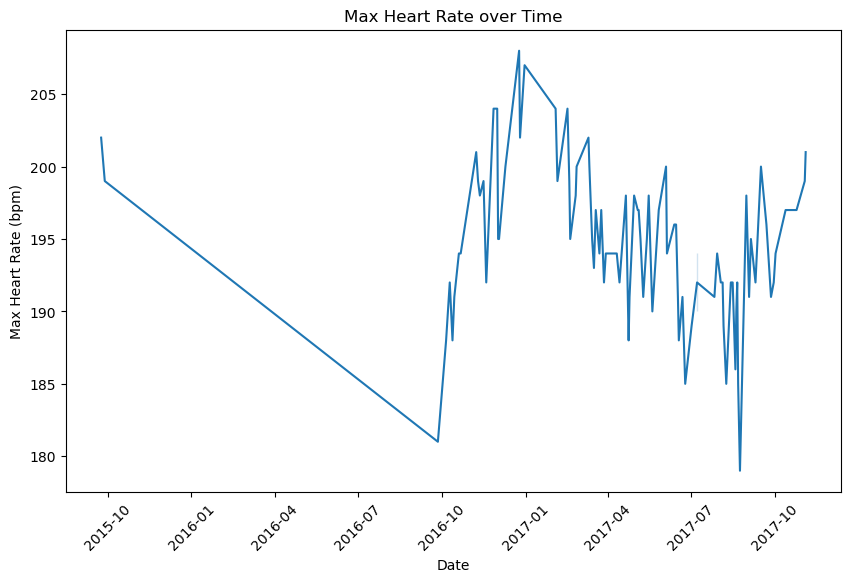

In [7]:
import pandas as pd


# Convert raw milliseconds to datetime
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp (Raw Milliseconds)'], unit='ms')
df['End Timestamp'] = pd.to_datetime(df['End Timestamp (Raw Milliseconds)'], unit='ms')

# Extract date part
df['Begin Date'] = df['Begin Timestamp'].dt.date
df['End Date'] = df['End Timestamp'].dt.date

# Display the first few rows to check the conversion
print(df.head())

# Plotting Max Heart Rate over Time
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Max Heart Rate over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Begin Date', y='Max. Heart Rate (bpm)', data=df)
plt.title('Max Heart Rate over Time')
plt.xlabel('Date')
plt.ylabel('Max Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.show()



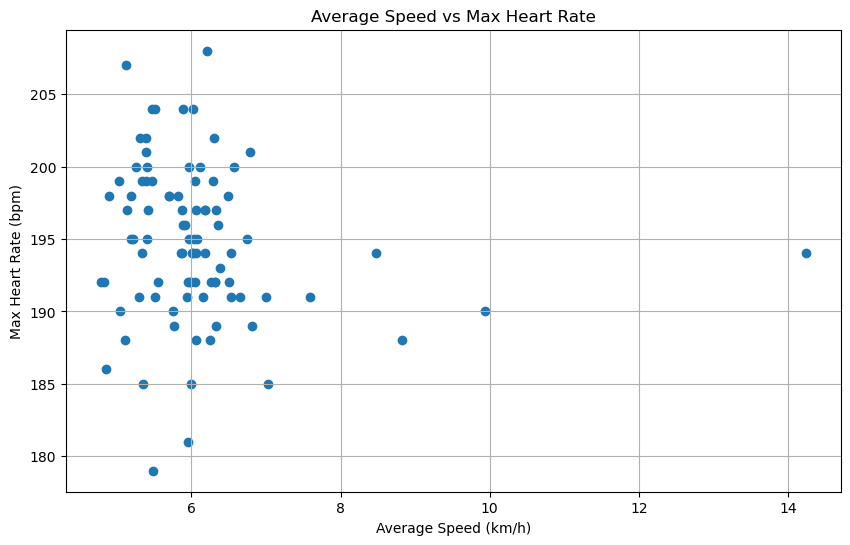

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Average Speed (Raw)'], df['Max. Heart Rate (bpm)'])
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Max Heart Rate (bpm)')
plt.title('Average Speed vs Max Heart Rate')
plt.grid(True)
plt.show()


In [2]:
 
import pandas as pd
running_data = pd.read_csv('C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Running Analysis/activities_cleaned.csv')


In [3]:
# Display the first few rows of the run activities DataFrame
print(running_data.head())

   Activity ID Activity Type   Begin Timestamp     End Timestamp  \
0   2284658991       Running   4/11/2017 12:07   4/11/2017 13:06   
1   2284658936       Running    3/11/2017 9:47   3/11/2017 10:35   
2   2228102647       Running  25/10/2017 16:31  25/10/2017 17:11   
3   2104984694       Running  13/10/2017 11:53  13/10/2017 12:41   
4   2084195352       Running   2/10/2017 14:51   2/10/2017 15:38   

   Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
0                 472.6                 472.6                 315.0   
1                 473.2                 473.2                 245.0   
2                 278.8                 278.8                 208.0   
3                 471.6                 471.6                 246.0   
4                 494.6                 494.6                 246.0   

   Elevation Loss (Raw)  Average Heart Rate (bpm)  Max. Heart Rate (bpm).1  \
0                 314.0                       182                      113   
1       

In [4]:
# Print dimensions of running data before removing null values
print("Dimensions of running data before removing null values:", running_data.shape)

Dimensions of running data before removing null values: (155, 28)


In [5]:
# Check for null values in each column
null_counts = running_data.isnull().sum()

# Display the count of null values in each column
print(null_counts)

Activity ID                              0
Activity Type                            0
Begin Timestamp                          0
End Timestamp                            0
Max. Elevation (Raw)                     0
Min. Elevation (Raw)                     0
Elevation Gain (Raw)                     0
Elevation Loss (Raw)                     0
Average Heart Rate (bpm)                 0
Max. Heart Rate (bpm).1                  0
Average Moving Speed                     0
Average Speed                            0
Max. Speed                               0
Distance (Raw)                           0
Duration (h:m:s)                         0
Moving Duration (h:m:s)                  0
Calories                                 0
Device                                   0
Begin Latitude (Decimal Degrees Raw)     0
Begin Longitude (Decimal Degrees Raw)    0
End Latitude (Decimal Degrees Raw)       0
End Longitude (Decimal Degrees Raw)      0
Temperature (Raw)                        0
Wind Speed 

In [14]:
print(running_data.dtypes)

Activity ID                                int64
Activity Type                             object
Begin Timestamp                           object
End Timestamp                             object
Max. Elevation (Raw)                     float64
Min. Elevation (Raw)                     float64
Elevation Gain (Raw)                     float64
Elevation Loss (Raw)                     float64
Average Heart Rate (bpm)                   int64
Max. Heart Rate (bpm).1                    int64
Average Moving Speed                      object
Average Speed                             object
Max. Speed                                object
Distance (Raw)                           float64
Duration (h:m:s)                          object
Moving Duration (h:m:s)                   object
Calories                                  object
Device                                    object
Begin Latitude (Decimal Degrees Raw)     float64
Begin Longitude (Decimal Degrees Raw)    float64
End Latitude (Decima

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataset is already loaded into running_data DataFrame

# Corrected column names
X = running_data[['Wind Speed (Raw)', 'Average Heart Rate (bpm)', 'Elevation Gain (Raw)']]
y = pd.to_timedelta(running_data['Duration (h:m:s)']).dt.total_seconds()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for regression models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optionally, inspect the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')




Mean Squared Error: 280477.8401468807
R^2 Score: 0.8393848146006647
Coefficients: [ -74.62061868 -112.42870784  808.09869644]
Intercept: 2392.6129032258063
